# Task-2: House Price Prediction [Golden Task Phase -1]

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Creating the dataframe
df=pd.read_csv("MagicBricks.csv")
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


# EDA

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [6]:
#To get number of rows and columns 
df.shape

(1259, 11)

In [7]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [8]:
#To get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [9]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [10]:
#Check missing values in the dataset
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

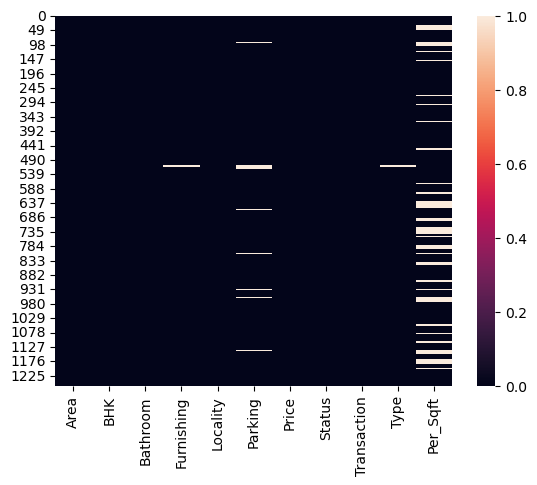

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
#To get missing value percentage
percentage_missing=df.isnull().sum()*100/len(df)
print(percentage_missing)

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64


In [13]:
#Check for duplicate data
duplicate_data=df.duplicated().any()
print(duplicate_data)

True


In [14]:
#drop all missing values
df.dropna(axis=0)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [15]:
#drop to duplicate data
df=df.drop_duplicates() 

In [16]:
#To get statistics about the dataframe
df.describe(include='all')

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1176.000000,1176.000000,1175.000000,1171,1176,1145.000000,1.176000e+03,1176,1176,1171,949.000000
unique,NaN,NaN,NaN,3,365,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,Semi-Furnished,Lajpat Nagar 3,NaN,NaN,Ready_to_move,Resale,Builder_Floor,NaN
freq,NaN,NaN,NaN,667,32,NaN,NaN,1115,741,643,NaN
mean,1447.542711,2.789966,2.552340,NaN,NaN,1.979039,2.109173e+07,NaN,NaN,NaN,15817.306639
std,1487.658687,0.960993,1.053319,NaN,NaN,6.493508,2.523174e+07,NaN,NaN,NaN,21761.574205
min,28.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000e+06,NaN,NaN,NaN,1259.000000
25%,800.000000,2.000000,2.000000,NaN,NaN,1.000000,5.800000e+06,NaN,NaN,NaN,6471.000000
50%,1172.500000,3.000000,2.000000,NaN,NaN,1.000000,1.400000e+07,NaN,NaN,NaN,11111.000000
75%,1700.000000,3.000000,3.000000,NaN,NaN,2.000000,2.600000e+07,NaN,NaN,NaN,18000.000000


In [17]:
df.isna().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

In [18]:
df.isna().mean()*100

Area            0.000000
BHK             0.000000
Bathroom        0.085034
Furnishing      0.425170
Locality        0.000000
Parking         2.636054
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.425170
Per_Sqft       19.302721
dtype: float64

In [19]:
#To find the number of unique values
df["Price"].nunique()

284

In [20]:
df["Status"].nunique()

2

In [21]:
df["Transaction"].nunique()

2

In [22]:
df["Parking"].nunique()

9

In [23]:
df["Furnishing"].nunique()

3

In [24]:
df["Locality"].nunique()

365

In [25]:
df["Area"].nunique()

315

In [26]:
df["Price"].value_counts()

15000000    26
25000000    20
6000000     20
30000000    19
7000000     19
            ..
21100000     1
10400000     1
55300000     1
8200000      1
22200000     1
Name: Price, Length: 284, dtype: int64

In [27]:
df["Locality"].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            32
Lajpat Naga

In [28]:
df.drop(["Furnishing", "Status", "Transaction", "Type"], axis=1).groupby("Locality").agg(np.median).T

Locality,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,"Vijay Enclave, Mahavir Enclave","Vijay Vihar, Rohini","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
Area,2700.0,1525.0,1400.0,540.0,750.0,540.0,1150.0,1360.0,750.0,1170.0,...,360.0,900.0,1100.0,825.0,1000.0,1017.0,1300.0,720.0,540.0,400.0
BHK,4.0,3.0,3.5,3.0,2.0,2.0,2.0,2.5,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
Bathroom,3.0,2.0,3.5,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
Parking,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,...,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
Price,60000000.0,14950000.0,11050000.0,4950000.0,3800000.0,3000000.0,7300000.0,17000000.0,12250000.0,7200000.0,...,2200000.0,4500000.0,22500000.0,8900000.0,4620000.0,6500000.0,15000000.0,8000000.0,1500000.0,9000000.0
Per_Sqft,22222.0,NaN,9655.0,19841.0,10320.0,5000.0,6347.0,12500.0,14444.0,8060.0,...,42222.0,6154.0,22000.0,8129.5,4620.0,6526.0,11538.0,10288.0,2778.0,14550.0


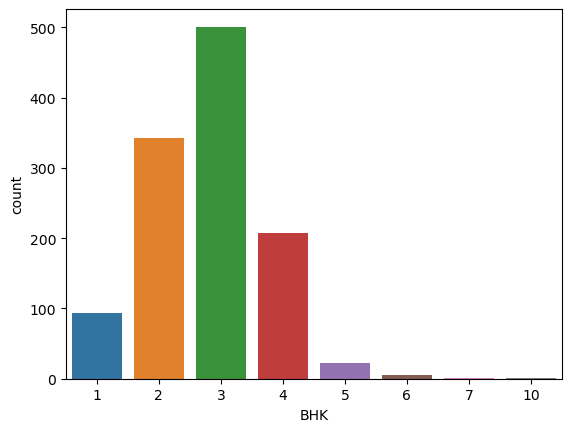

In [29]:
sns.countplot(x='BHK',data=df)
plt.show()

There are more 3 BHK houses followed by 2 BHK, 4 BHK and 1 BHK.
There are few records available for 5, 6, 7 and 10 BHK as well.

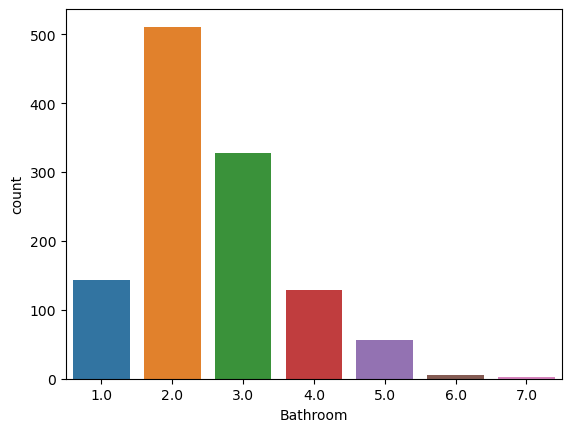

In [30]:
sns.countplot(x="Bathroom", data=df)
plt.show()

Most of the houses have 2 bathrooms.
About 350 of the houses have 3 bathrooms.
There are about 150 houses which have 1 bathroom or 4 bathrooms.
Some houses do have more than 4 bathrooms as well.

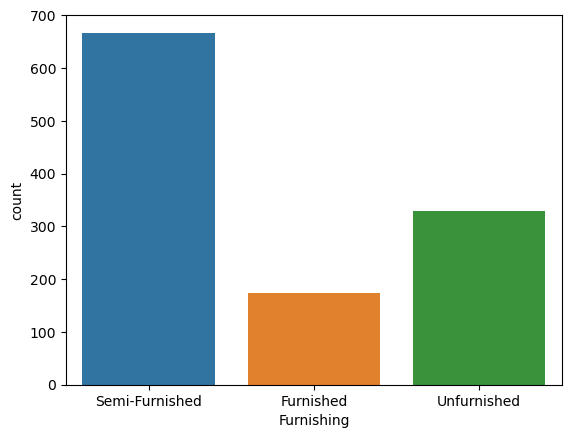

In [31]:
sns.countplot(x="Furnishing", data=df)
plt.show()

Majority of the houses are Semi-Furnished.

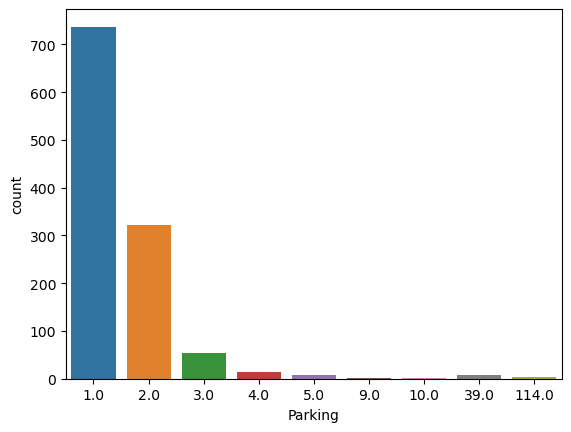

In [32]:
sns.countplot(x="Parking",data=df)
plt.show()

In [33]:
df["Parking"].value_counts()

1.0      737
2.0      321
3.0       54
4.0       14
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: Parking, dtype: int64

Parking column have some offset values like 39 and 114. We might need to check on the validity of these entries.

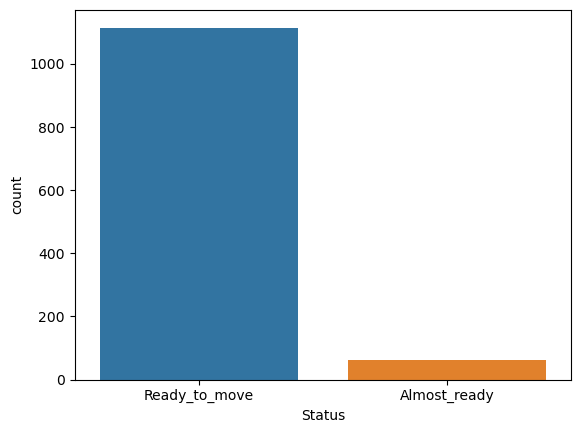

In [34]:
sns.countplot(x="Status",data=df)
plt.show()

Most of the houses are in ready to move condition.

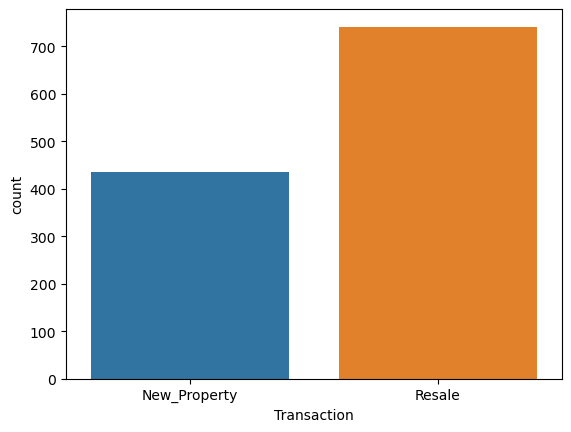

In [35]:
sns.countplot(x="Transaction",data=df)
plt.show()

Majority of the houses are for Resale

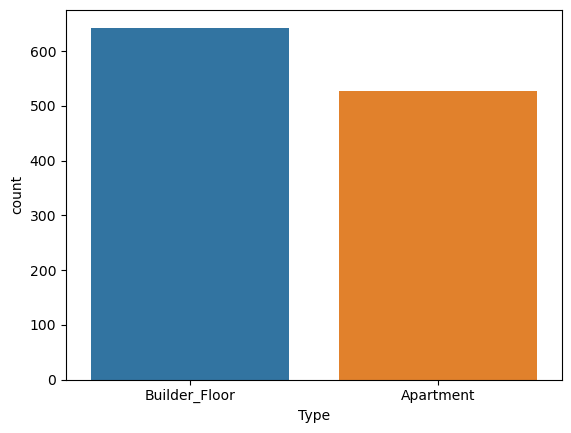

In [36]:
sns.countplot(x="Type",data=df)
plt.show()

There seems to almost equal number of house types: Apartment and Builder Floor

<Axes: xlabel='Area', ylabel='Price'>

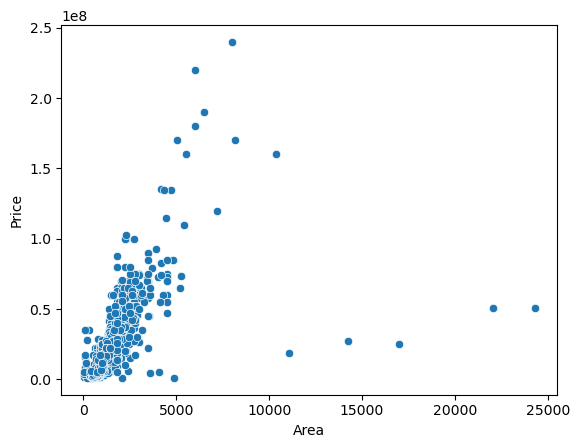

In [37]:
sns.scatterplot(y = 'Price', x = 'Area', data = df)

The house price rises as the Area increases.
There are some outliers with more than 10000 Area.

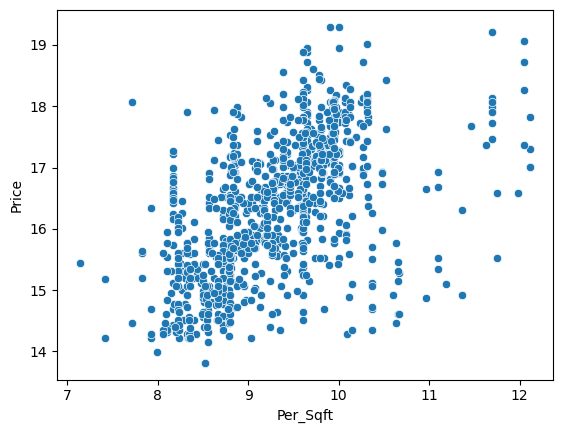

In [38]:
sns.scatterplot(x=np.log(df["Per_Sqft"]), y=np.log(df["Price"]))
plt.show()

There is no visible trend in the actual values of the Per_Sqft with Price. However, the their logs show near linear relationship

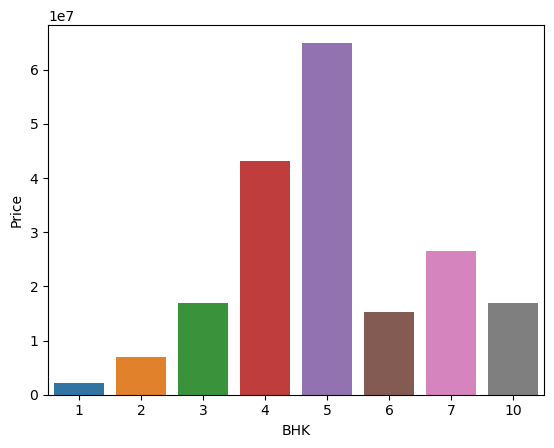

In [39]:
temp = pd.pivot_table(data=df, values=["Price"], index="BHK", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

The houses see a rise in the Price as the number of BHK increase upto 5 and then it sees a sharp decline in the Prices for 6, 7 and 10

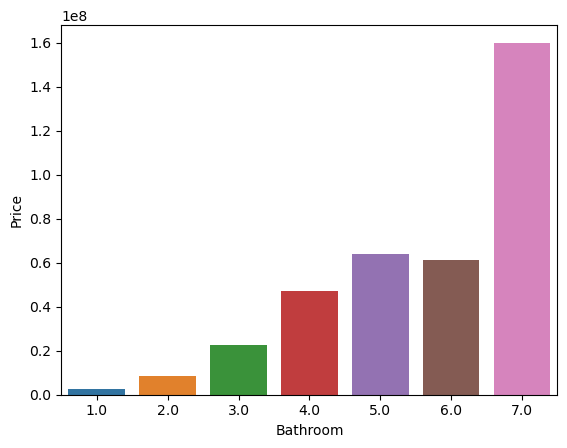

In [40]:
temp = pd.pivot_table(data=df, values=["Price"], index="Bathroom", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

The house prices normally increase as the number of bathroom increase.

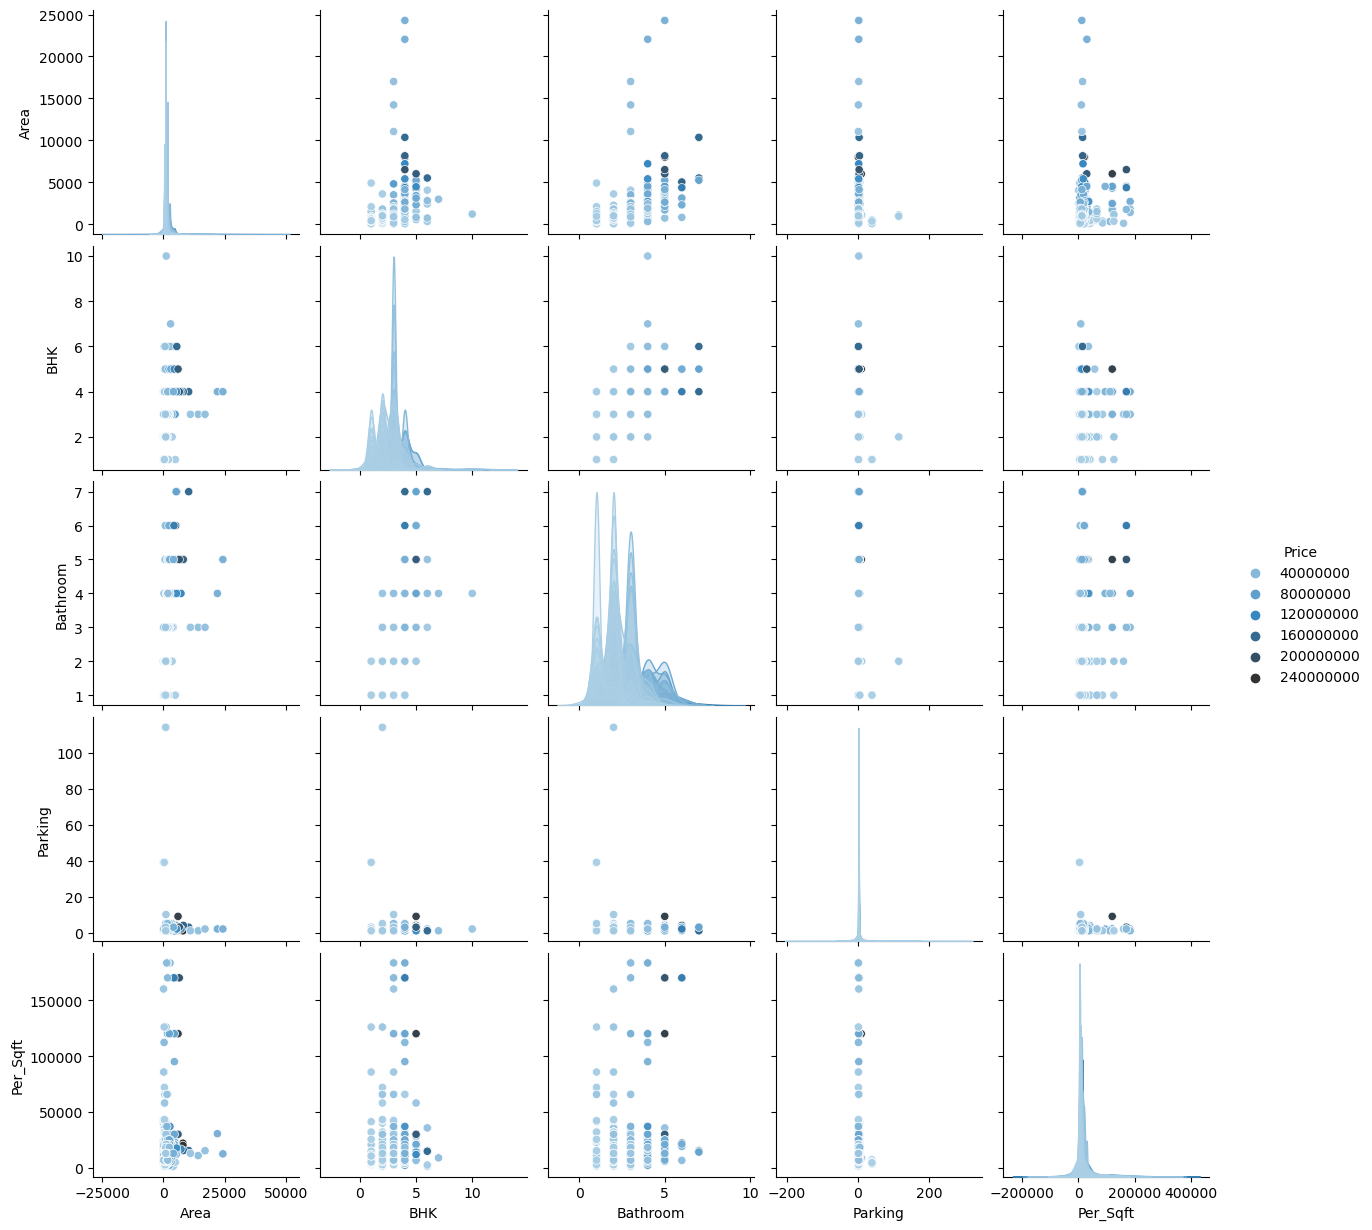

In [41]:
sns.pairplot(df,hue="Price",palette="Blues_d")

In [42]:
df.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.461125,0.554409,-0.010964,0.602679,0.161889
BHK,0.461125,1.000000,0.771053,-0.072551,0.566039,0.179493
Bathroom,0.554409,0.771053,1.000000,-0.035055,0.731663,0.217231
Parking,-0.010964,-0.072551,-0.035055,1.000000,-0.001833,-0.000116
Price,0.602679,0.566039,0.731663,-0.001833,1.000000,0.323747
Per_Sqft,0.161889,0.179493,0.217231,-0.000116,0.323747,1.000000


With this we can say that Parking and Per_Sqft don't make much impact on the price. The Bathroom and Area has more impact over the price, when area is increases the price increases and also when the no. of bathrooms increases the price increases.
Since the price is more influenced by the data of area and bathrooms the model will become more biased to these features, therefore  feature scaling need to be done.

# Split the Dataset

In [43]:
#Split the data into traning and testing sets
X=df[['Area', 'BHK','Bathroom', 'Parking']]
y=df['Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

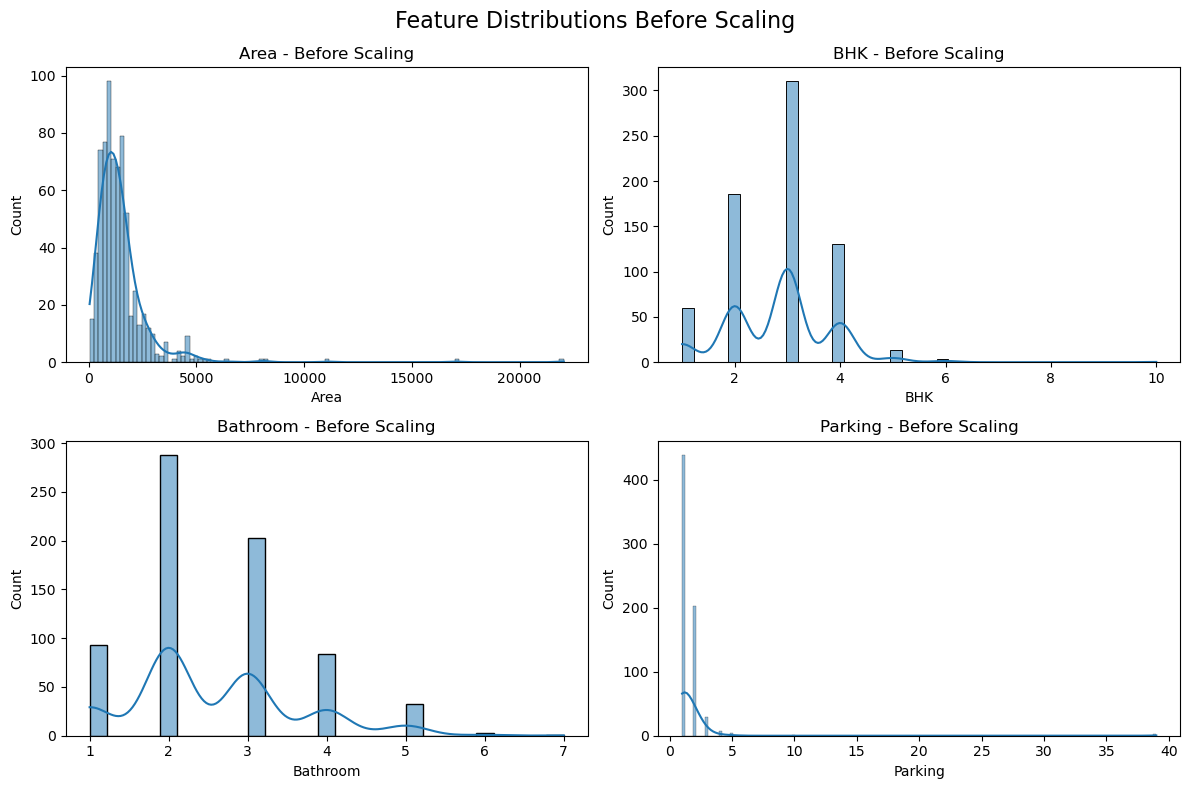

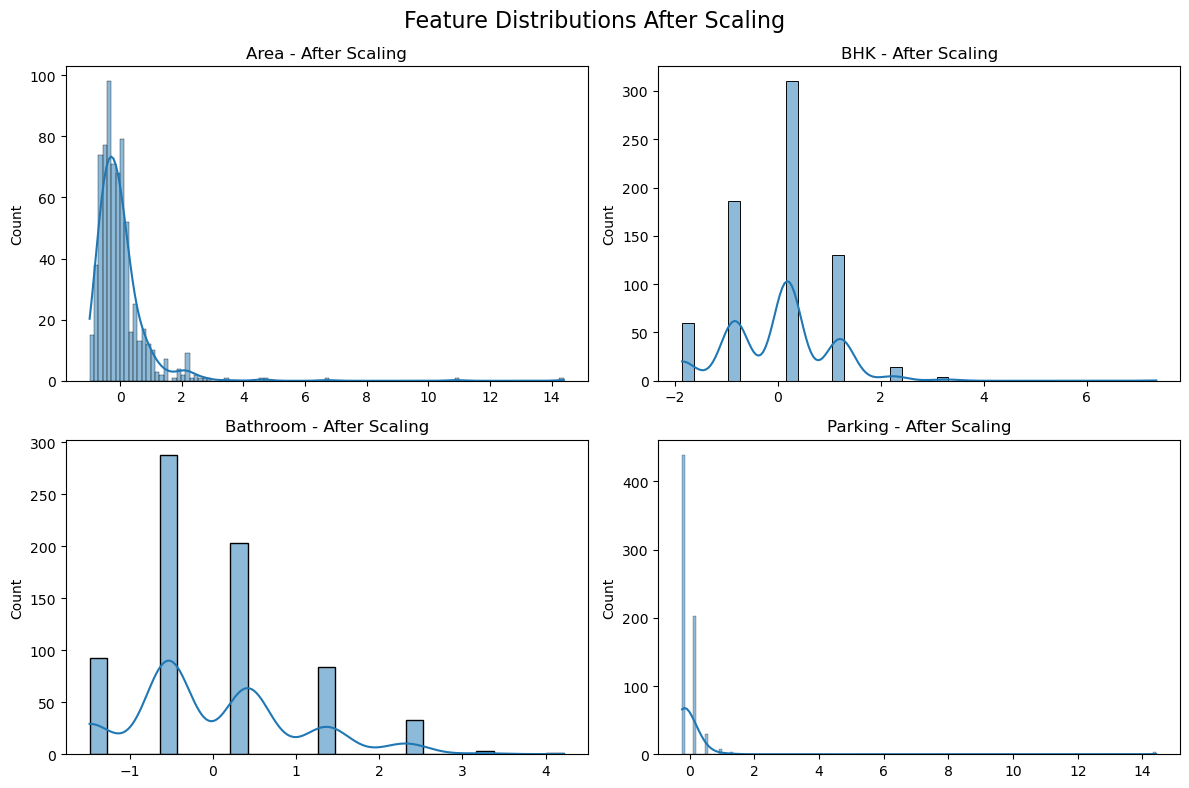

In [45]:
#Scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create subplots for feature distributions before and after scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(X_train[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} - Before Scaling')

fig.suptitle('Feature Distributions Before Scaling', fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(X_train_scaled[:, i], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} - After Scaling')

fig.suptitle('Feature Distributions After Scaling', fontsize=16)
plt.tight_layout()
plt.show()


Now, after scaling the features we brought the features scale ranging from -2 to 14.
which now helps the model to predict faster and unbaised regarding the features

# Applying Linear Regression

In [46]:
X_train.isnull().sum()

Area         0
BHK          0
Bathroom     0
Parking     19
dtype: int64

In [47]:
X_train.fillna(X_train.mean(), inplace=True)

In [48]:
X_test.fillna(X_test.mean(), inplace=True)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

# LinearRegression Model Evaluation

In [52]:
print(model.intercept_)

-21750477.54292092


In [53]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Area,5.090283e+03
BHK,-4.563946e+04
Bathroom,1.383908e+07
Parking,4.269028e+05


# Predictions from our Linear Regression Model

In [54]:
predictions = model.predict(X_test)

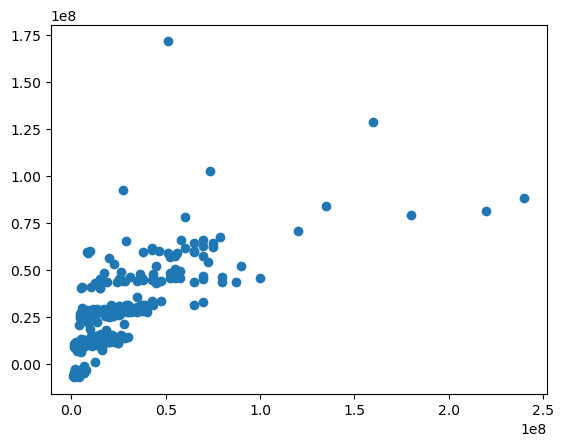

In [55]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is not in a proper line shape, which means our model has done bad predictions.

We use a RandomForestRegressor model to get a good prediction of House price. 

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 156860354410993.0


In [57]:
Y_pred = model.predict(X_test)
print("Accuracy Score for Test Dataset is ",model.score(X_test, y_test)*100,"%")
print("Accuracy Score for Train Dataset is",model.score(X_train,y_train)*100,"%")

Accuracy Score for Test Dataset is  75.75589545306225 %
Accuracy Score for Train Dataset is 92.25848119108558 %


now model has an accuracy of 92.2584 % which is pretty good and lets test it

# Regression Evaluation Metrics

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9585692.405449327
MSE: 297061453349566.9
RMSE: 17235470.789902054


# Testing

In [59]:
#We can create a DataFrame to display the actual and predicted prices side by side
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
results = results.round(2)  # Round the prices to two decimal places
print(results)

      Actual Price  Predicted Price
137       15500000      11226194.05
1120      37500000      43794642.86
989       24700000      22347916.67
539       29500000      30102908.47
2         15500000      14187904.17
...            ...              ...
160        2000000       2896904.17
865        4500000       5566000.00
949        4800000       7350568.23
96        30000000      17208106.75
749        9000000       7350568.23

[471 rows x 2 columns]


In [60]:
warnings.filterwarnings("ignore", category=UserWarning)
def predict_house_price():
    print("Enter the required house details:")
    Area = float(input("Area of the house: "))
    BHK = int(input("No. of BHK: "))
    Bathroom = float(input("No. of bathroom: "))
    Parking = float(input("No. of Parking: "))

    # Scale the user inputs using the fitted scaler
    features = np.array([[Area, BHK, Bathroom, Parking]])
    features_scaled = scaler.transform(features)
    price = model.predict(features_scaled)
    rounded_price = int(round(price[0]))

    return rounded_price

# Example usage:
# Make the price prediction based on user input
predicted_price = predict_house_price()
print("Predicted Price:", predicted_price)

Enter the required house details:
Area of the house: 800
No. of BHK: 3
No. of bathroom: 2
No. of Parking: 1
Predicted Price: 3809133


# Conclusion
* the model will predict the outcome "PRICE" based on four features "Area,BHK,Bathroom,Parking" of the house.
* this multiple linear regression model is bulid using the gradient descent algorithm
* the model is predicting fine with an accuracy of 92.2584% 